# **Hospital Operations & Management – Exploratory Data Analysis (EDA)**

## Problem Statement

Hospitals face challenges in managing emergency admissions, bed availability, length of stay, and rising treatment costs, which impact operational efficiency and profitability.

## Objective

To analyze hospital operations data using EDA to understand patient flow, length of stay, cost patterns, and profitability, and provide insights for better resource planning and cost control.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [ ]:
df=pd.read_csv("/content/Hospitalops_cleaned1.csv")

## Understand the data

In [ ]:
df.head()

,Hospital Service Area,Hospital County,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Description,Payment Typology 1,EmergeNocYes DepartmeNot INodicator,Total Charges,Total Costs
0,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,Female,27,Emergency,Home / Self Care,1/1/2021,COVID-19,Government,Yes,"$320,922.43","$60,241.34"
1,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,Male,4,Emergency,Home / Self Care,1/1/2021,Multiple sclerosis,Private,Yes,"$61,665.22","$9,180.69"
2,New York City,Bronx,Montefiore Medical Center-Wakefield Hospital,18 to 29,Male,2,Emergency,Home / Self Care,1/1/2021,Previous C-section,Government,No,"$42,705.34","$11,366.50"
3,New York City,Bronx,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,Female,5,Emergency,Home / Self Care,1/1/2021,Urinary tract infections,Government,Yes,"$72,700.17","$12,111.75"
4,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,Male,3,Emergency,Home / Self Care,1/1/2021,Paralysis (other than cerebral palsy),Government,Yes,"$55,562.51","$8,339.72"


In [ ]:
df.shape

(23689, 14)

### Dataset Summary:

Total Records: 99,644 patient admissions

Total Features: 14

Data Type: Hospital operational and financial data

In [ ]:
#Description for columns:
#1. Hospital Service Area - City where hospital present
#2. Hospital County - County where hosiptal present
#3. Facility name - Hospital Name
#4. Age Group - Age group of patient
#5. Gender - Gender of patient (Male/Female)
#6. Length of Stay - no. of days patient stayed in Hospital for treatment
#7. Type of Admission - The type of admission through which patient was admited
#8. Patient Disposition - The status of patient after discharge
#9. Discharge Year  - the year of patient discharged
#10.CCSR Diagnosis Description - The disease description of patient
#11. Payment Typology 1 - Insurance pay type / primary payer
#12.  EmergeNocYes DepartmeNot INodicator- The patient is admiited through Emergency(Yes/No)
#13. Total Charges - Total charges cost to a patient
#14. Total Costs - Total costs cost to Hospital

In [ ]:
df.columns

Index(['Hospital Service Area', 'Hospital County', 'Facility Name',
       'Age Group', 'Gender', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Description',
       'Payment Typology 1', 'EmergeNocYes DepartmeNot INodicator',
       'Total Charges', 'Total Costs'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Hospital Service Area                23689 non-null  object
 1   Hospital County                      23689 non-null  object
 2   Facility Name                        23689 non-null  object
 3   Age Group                            23689 non-null  object
 4   Gender                               23688 non-null  object
 5   Length of Stay                       23688 non-null  object
 6   Type of Admission                    23688 non-null  object
 7   Patient Disposition                  23688 non-null  object
 8   Discharge Year                       23688 non-null  object
 9   CCSR Diagnosis Description           23688 non-null  object
 10  Payment Typology 1                   23688 non-null  object
 11  EmergeNocYes DepartmeNot INodicator  2368

## Data Cleaning & Preprocessing

In [ ]:
df['Total Charges']=df['Total Charges'].str.replace(",","", regex=False).str.replace("$","",regex=False).astype(float) #Converted Total Charges and Total Costs from string to numeric

In [ ]:
df['Total Costs']=df['Total Costs'].str.replace(",", "", regex=False).str.replace("$", "", regex=False).astype(float)

In [ ]:
df['Length of Stay']=df['Length of Stay'].str.replace("+","").str.strip().astype(float) #Cleaned Length of Stay values and converted to numeric

In [ ]:
df['Discharge Year']=pd.to_datetime(df['Discharge Year']) #Converted Discharge Year to datetime format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23689 entries, 0 to 23688
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Hospital Service Area                23689 non-null  object        
 1   Hospital County                      23689 non-null  object        
 2   Facility Name                        23689 non-null  object        
 3   Age Group                            23689 non-null  object        
 4   Gender                               23688 non-null  object        
 5   Length of Stay                       23688 non-null  float64       
 6   Type of Admission                    23688 non-null  object        
 7   Patient Disposition                  23688 non-null  object        
 8   Discharge Year                       23688 non-null  datetime64[ns]
 9   CCSR Diagnosis Description           23688 non-null  object        
 10  Payment Ty

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Length of Stay,23688.0,6.199595,1.0,2.0,3.0,7.0,120.0,9.339314
Discharge Year,23688,2021-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,NaN
Total Charges,23688.0,70031.988132,46.05,20592.615,38770.735,77042.3025,8421962.33,134690.799816
Total Costs,23688.0,25817.335252,6.56,7788.9625,14779.965,28951.295,2239309.41,46551.270458


In [ ]:
df.isnull().sum()

,0
Hospital Service Area,0
Hospital County,0
Facility Name,0
Age Group,0
Gender,1
Length of Stay,1
Type of Admission,1
Patient Disposition,1
Discharge Year,1
CCSR Diagnosis Description,1


no null values

In [ ]:
df.duplicated().sum()

np.int64(0)

no duplicates

# **Exploratory Data Analysis**

### 1. Patient Demographics & Admission Patterns

In [ ]:
df['Gender'].value_counts() #Gender Distribution

,count
Gender,
Male,12510
Female,11176
U,2


In [ ]:
df['EmergeNocYes DepartmeNot INodicator'].value_counts()

,count
EmergeNocYes DepartmeNot INodicator,
Yes,14809
No,8879


Insight : Majority patient are coming from Emergency department. Hospital must look onto beds availability and staff planning.

In [ ]:
df['Payment Typology 1'].value_counts()

,count
Payment Typology 1,
Government,17983
Private,5257
Self Pay,280
Other,168


Insight: Majority of patient coming under Government Insurance. Cash flow may be slow(Government rebursements).

In [ ]:
df['Age Group'].value_counts()


,count
Age Group,
50 to 69,6847
70 or Older,5937
30 to 49,5361
0 to 17,2958
18 to 29,2585
70,1


Insight: Majority of patients are Older age. Hospital needs to take more geriatic and chronic care services.So More bed utilisation , more staff and proper costings.

In [ ]:
df['Type of Admission'].value_counts()

,count
Type of Admission,
Emergency,16235
Elective,3956
Newborn,1986
Urgent,1459
Trauma,52


Insight: Majority patients are admitted through Emergency department. So this department must have proper beds management, staff planning, resources, proper costings control.  

In [ ]:
df['Patient Disposition'].value_counts()

,count
Patient Disposition,
Home / Self Care,19293
Long-Term / Custodial Care,1457
Other,1070
Hospice / End-of-Life Care,975
Acute / Hospital Care,893


Insight: Majority patient after discharge return home and self care indicates propr routine recovery. Insiginificant patients needs Hospital involvement  after discharge impacts bed utilization , staff planning.

In [ ]:
df['Facility Name'].value_counts()

,count
Facility Name,
Bellevue Hospital Center,1455
Montefiore Medical Center - Henry & Lucy Moses Div,1307
Jacobi Medical Center,1267
Mount Sinai Hospital,1211
Lincoln Medical & Mental Health Center,1090
Strong Memorial Hospital,1070
Elmhurst Hospital Center,1066
Kings County Hospital Center,1036
Nassau University Medical Center,1002


Insight: Top hospitals have high admissions which needs more beds availabilty , capacity planning , staff planning , and proepr cost control. These top hospitals must be under high operational pressure and patient load.

### 2. Hospital Volume Analysis

### **Top 5 Busiest Hospitals**

In [ ]:
top_busiest_hosp=df['Facility Name'].value_counts().head(5).reset_index()

In [ ]:
top_busiest_hosp

,Facility Name,count
0,Bellevue Hospital Center,1455
1,Montefiore Medical Center - Henry & Lucy Moses...,1307
2,Jacobi Medical Center,1267
3,Mount Sinai Hospital,1211
4,Lincoln Medical & Mental Health Center,1090


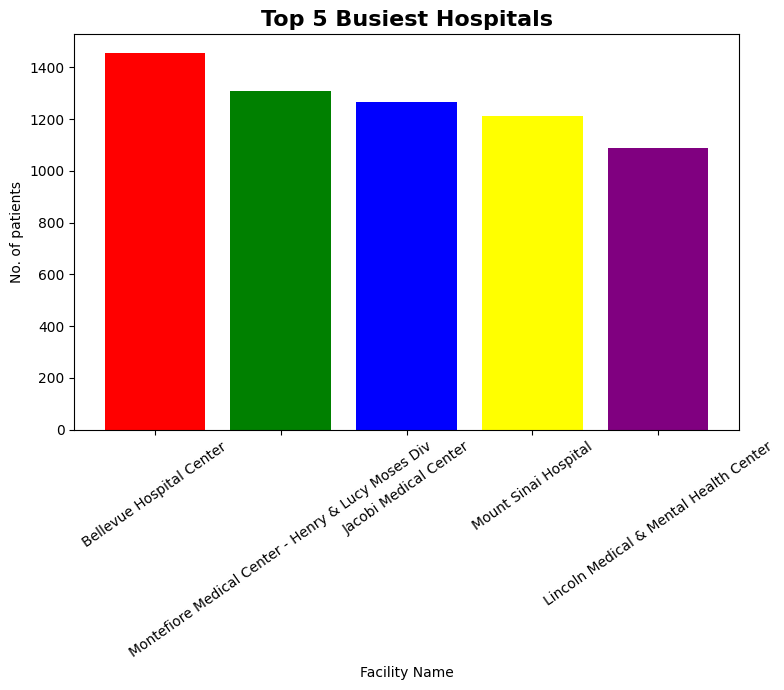

In [ ]:
plt.figure(figsize=(8,7))

plt.bar(top_busiest_hosp['Facility Name'], top_busiest_hosp['count'], color=['red','green','blue','yellow','purple'])
plt.title("Top 5 Busiest Hospitals", fontsize=16, fontweight='bold')
plt.xlabel("Facility Name")
plt.ylabel("No. of patients")
plt.xticks(rotation=35)

plt.tight_layout()
plt.show()


In [ ]:
top_busiest_hosp

,Facility Name,count
0,Bellevue Hospital Center,1455
1,Montefiore Medical Center - Henry & Lucy Moses...,1307
2,Jacobi Medical Center,1267
3,Mount Sinai Hospital,1211
4,Lincoln Medical & Mental Health Center,1090


Insights:

1. Mount Sinai Hospital & NYU Langone Hospitals shows highest patient load indicating risk of bed shortage, needs more staff planning and proper planning for Emergency load.

### 3. Emergency vs Non-Emergency Admissions

In [ ]:
df.columns

Index(['Hospital Service Area', 'Hospital County', 'Facility Name',
       'Age Group', 'Gender', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Description',
       'Payment Typology 1', 'EmergeNocYes DepartmeNot INodicator',
       'Total Charges', 'Total Costs'],
      dtype='object')

In [ ]:
emergency_admission=df['EmergeNocYes DepartmeNot INodicator'].value_counts().reset_index()

In [ ]:
emergency_admission

,EmergeNocYes DepartmeNot INodicator,count
0,Yes,14809
1,No,8879


In [ ]:
x=emergency_admission['count']

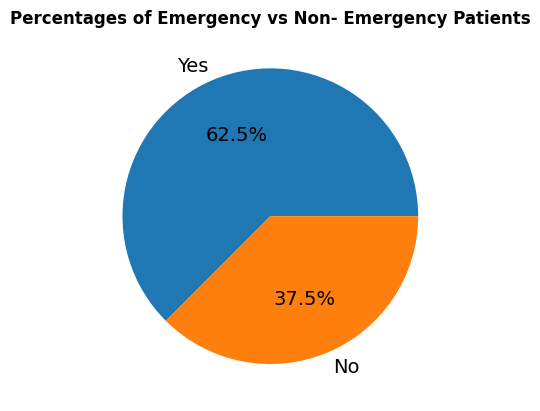

In [ ]:
plt.pie(emergency_admission['count'], autopct='%1.1f%%', labels=emergency_admission['EmergeNocYes DepartmeNot INodicator'], textprops={'fontsize': 14})
plt.title("Percentages of Emergency vs Non- Emergency Patients", weight='bold')
plt.show()

Insights:

1. High proportions for emergenvcy patients indicating need more **beds availability** , **ER staffs** planning , more **equipment** and cost control.

2. Proper **discharge planning** needed for efficient patient flow.

### 4. Length of Stay(Bed utilisation)

In [ ]:
df.head()

,Hospital Service Area,Hospital County,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Description,Payment Typology 1,EmergeNocYes DepartmeNot INodicator,Total Charges,Total Costs
0,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,Female,27.0,Emergency,Home / Self Care,2021-01-01,COVID-19,Government,Yes,320922.43,60241.34
1,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,Male,4.0,Emergency,Home / Self Care,2021-01-01,Multiple sclerosis,Private,Yes,61665.22,9180.69
2,New York City,Bronx,Montefiore Medical Center-Wakefield Hospital,18 to 29,Male,2.0,Emergency,Home / Self Care,2021-01-01,Previous C-section,Government,No,42705.34,11366.50
3,New York City,Bronx,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,Female,5.0,Emergency,Home / Self Care,2021-01-01,Urinary tract infections,Government,Yes,72700.17,12111.75
4,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,Male,3.0,Emergency,Home / Self Care,2021-01-01,Paralysis (other than cerebral palsy),Government,Yes,55562.51,8339.72


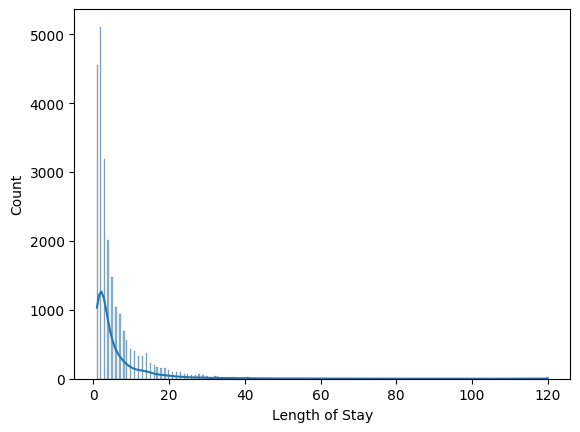

In [ ]:
sns.histplot(df['Length of Stay'], kde=True)
plt.show()

This graph show due to extreme values of LOS, the data is **rightly skewed**. So, we will compute median to estimate average for LOS.

In [ ]:
average_LOS=df['Length of Stay'].median()
print(f'Average Length of Stay : {average_LOS:.2f} days')

Average Length of Stay : 3.00 days


In [ ]:
df.columns

Index(['Hospital Service Area', 'Hospital County', 'Facility Name',
       'Age Group', 'Gender', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Description',
       'Payment Typology 1', 'EmergeNocYes DepartmeNot INodicator',
       'Total Charges', 'Total Costs'],
      dtype='object')

In [ ]:
#avg los by admission_type and Disease diagnosis

avg_los_admission_type=df.groupby('Type of Admission')['Length of Stay'].mean().sort_values( ascending=False).reset_index()
avg_los_admission_type

,Type of Admission,Length of Stay
0,Urgent,7.346127
1,Trauma,7.115385
2,Emergency,6.863135
3,Elective,4.300303
4,Newborn,3.692346


/tmp/ipython-input-3805053989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type of Admission',y='Length of Stay',data=avg_los_admission_type, palette='Set2')


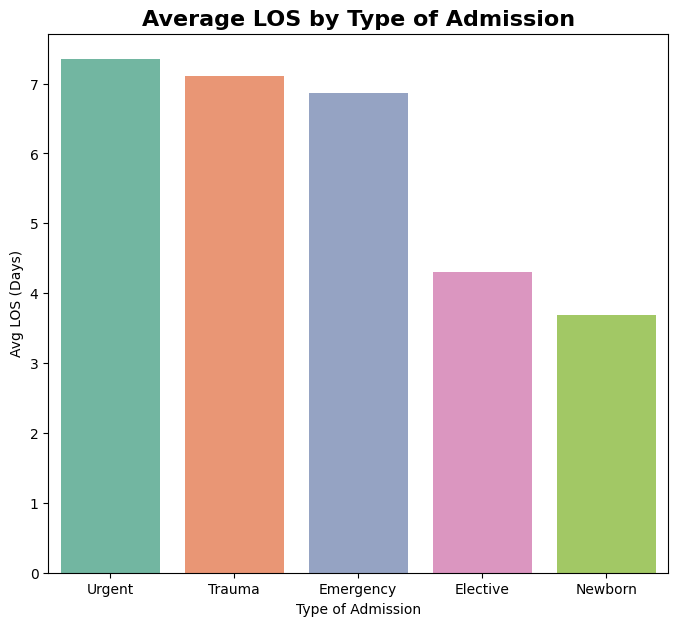

In [ ]:
plt.figure(figsize=(8,7))

sns.barplot(x='Type of Admission',y='Length of Stay',data=avg_los_admission_type, palette='Set2')
plt.title("Average LOS by Type of Admission",fontsize=16, fontweight='bold')
plt.xlabel("Type of Admission")
plt.ylabel("Avg LOS (Days)")
plt.show()

Insight:
1. Urgent, Emergency , Trauma  shows high LOS avg days indicating risk of shortage of beds availability.

2. Elective , Newborn shows less avg LOS indicating  optimising scheduling.

3. Discharge process must improved for emergency/urgent patients to free up beds faster.


### 5. Cost & Revenue Analysis

#### Cost & Charges Distribution

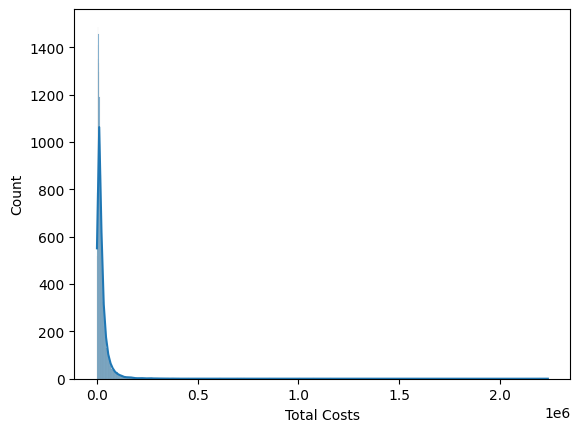

In [ ]:
sns.histplot(df['Total Costs'], kde=True)
plt.show()

The above graph shows that Total Charges columns is **Rightly skewed**. So, I used median() to compute average to get typical average cost.

In [ ]:
avg_total_charges=df['Total Charges'].median()
print(f'The average total charges is : {avg_total_charges:.2f}$')

The average total charges is : 38770.74$


In [ ]:
avg_total_cost=df['Total Costs'].median()
print(f'The average total charges is : {avg_total_cost:.2f}$')

The average total charges is : 14779.97$


### Margin Analysis

In [ ]:
df['Margin$']=df['Total Charges']-df['Total Costs']

In [ ]:
df.head()

,Hospital Service Area,Hospital County,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Description,Payment Typology 1,EmergeNocYes DepartmeNot INodicator,Total Charges,Total Costs,Margin$
0,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,Female,27.0,Emergency,Home / Self Care,2021-01-01,COVID-19,Government,Yes,320922.43,60241.34,260681.09
1,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,Male,4.0,Emergency,Home / Self Care,2021-01-01,Multiple sclerosis,Private,Yes,61665.22,9180.69,52484.53
2,New York City,Bronx,Montefiore Medical Center-Wakefield Hospital,18 to 29,Male,2.0,Emergency,Home / Self Care,2021-01-01,Previous C-section,Government,No,42705.34,11366.50,31338.84
3,New York City,Bronx,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,Female,5.0,Emergency,Home / Self Care,2021-01-01,Urinary tract infections,Government,Yes,72700.17,12111.75,60588.42
4,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,Male,3.0,Emergency,Home / Self Care,2021-01-01,Paralysis (other than cerebral palsy),Government,Yes,55562.51,8339.72,47222.79


In [ ]:
df['Profit/Loss']=df['Margin$'].apply(lambda x: 'Profit' if x>0 else 'Loss')

In [ ]:
df['Profit/Loss'].value_counts()

,count
Profit/Loss,
Profit,23636
Loss,53


Insight:

1. Profit is comparibiliy more than Loss indicates **sustainable revenue** means pricing is covering treatment costs.

2. Loss margin count is 1241 which highlights **financial pressure** areas where cost is exceeding charges may be caused by high LOS, resourse usage.

### Charges vs Costs by Diagnosis

In [ ]:
diagnosis_financials=(df.groupby('CCSR Diagnosis Description').agg(Median_cost=('Total Costs','median'), Median_charge=('Total Charges','median'), Median_margin=('Margin$','median')).sort_values('Median_cost',ascending=False))
diagnosis_financials

,Median_cost,Median_charge,Median_margin
CCSR Diagnosis Description,,,
Short gestation; low birth weight; and fetal growth retardation,850894.110,3429545.050,2578650.940
Leukemia - acute lymphoblastic leukemia (ALL),260472.795,574898.645,373596.055
Male reproductive system cancers - testis,253557.350,1120755.610,867198.260
Mental and substance use disorders in remission,114332.120,228180.645,113848.525
Scoliosis and other postural dorsopathic deformities,97886.650,253153.000,158681.800
...,...,...,...
Female reproductive system cancers - vulva,3421.800,9573.960,6152.160
Cornea and external disease,3249.090,8850.000,5600.910
Hemorrhage after first trimester,3186.830,5956.950,2770.120


### Loss-making patterns

In [ ]:
loss_making=diagnosis_financials[diagnosis_financials['Median_margin'] < 0]
loss_making

,Median_cost,Median_charge,Median_margin
CCSR Diagnosis Description,,,


Insight:
1. There is no loss making patterns suggests the low margin are **case specific**.

## Top 5 expensive Diagnoses

In [ ]:
top_diagnoses=diagnosis_financials.head(5).reset_index()
top_diagnoses

,CCSR Diagnosis Description,Median_cost,Median_charge,Median_margin
0,Short gestation; low birth weight; and fetal g...,850894.110,3429545.050,2578650.940
1,Leukemia - acute lymphoblastic leukemia (ALL),260472.795,574898.645,373596.055
2,Male reproductive system cancers - testis,253557.350,1120755.610,867198.260
3,Mental and substance use disorders in remission,114332.120,228180.645,113848.525
4,Scoliosis and other postural dorsopathic defor...,97886.650,253153.000,158681.800


/tmp/ipython-input-1096909063.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Median_cost',y='CCSR Diagnosis Description', data=top_diagnoses, palette='Set1')


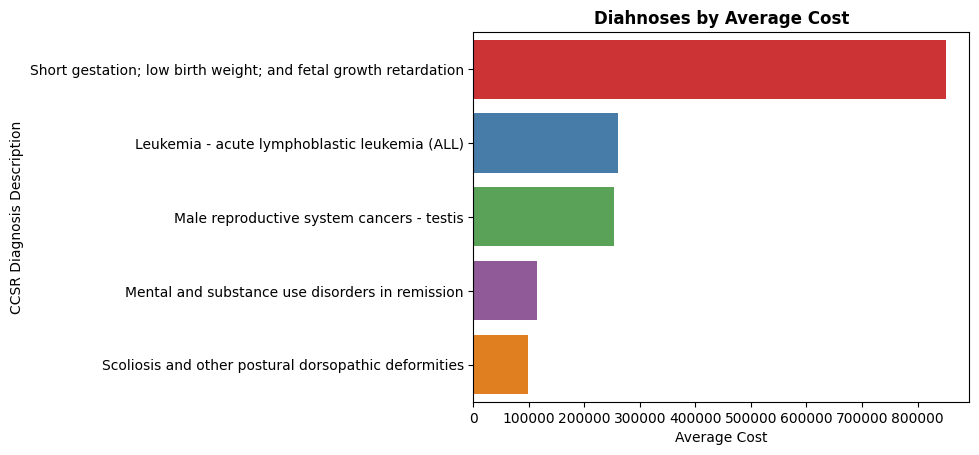

In [ ]:
sns.barplot(x='Median_cost',y='CCSR Diagnosis Description', data=top_diagnoses, palette='Set1')
plt.title("Diahnoses by Average Cost", fontweight='bold')
plt.xlabel("Average Cost")
plt.ylabel("CCSR Diagnosis Description")

plt.show()

Insights:

1. Short gestation; low birth weight; and fetal growth retardation are most expensice and more costly to hospital.
2. Followed then,Leukemia - acute lymphoblastic leukemia (ALL) also expensive to hospital indicates long treatment and resource intesive.

## Costs vs Charges Visualisation

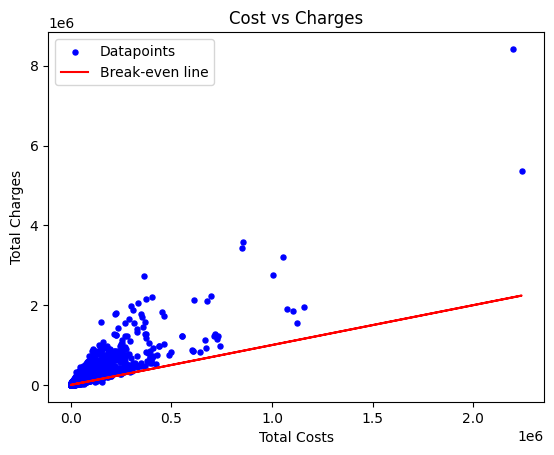

In [ ]:
plt.scatter(df['Total Costs'],df['Total Charges'], color='blue',s=13, label='Datapoints')
plt.plot(df['Total Costs'], df['Total Costs'], linestyle='-', color='red',linewidth=1.5, label='Break-even line')
plt.title("Cost vs Charges")
plt.xlabel("Total Costs")
plt.ylabel("Total Charges")
plt.legend()

plt.show()


Insights:
1. Most the datapoints are above the break-even line which means Total charges are higher than Total Costs indicating **Profit**.

2. Many datapoints are clustered near break even line which causing **Financial pressure(Loss) **needs Pricing improvement.

3. Two extreme datapoints means **high cost cases** suggests proper auditing needed so that resource can't be wasted.

### Cost by Admission Type

In [ ]:
df.columns

Index(['Hospital Service Area', 'Hospital County', 'Facility Name',
       'Age Group', 'Gender', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Description',
       'Payment Typology 1', 'EmergeNocYes DepartmeNot INodicator',
       'Total Charges', 'Total Costs', 'Margin$', 'Profit/Loss'],
      dtype='object')

In [ ]:
cost_by_admission_type= df.groupby(['Type of Admission'])['Total Costs'].median().sort_values(ascending=False).reset_index()
cost_by_admission_type

,Type of Admission,Total Costs
0,Trauma,20134.79
1,Elective,19991.17
2,Emergency,15370.51
3,Urgent,14468.13
4,Newborn,4858.87


/tmp/ipython-input-3690714201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cost_by_admission_type, x=cost_by_admission_type['Type of Admission'], y=cost_by_admission_type['Total Costs'],palette='Paired')


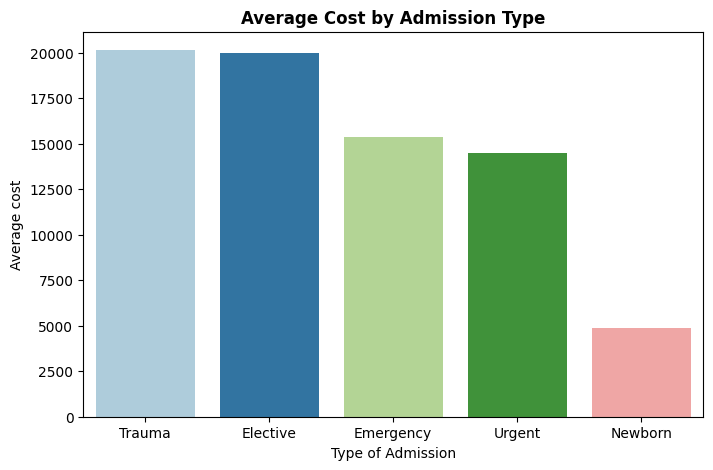

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=cost_by_admission_type, x=cost_by_admission_type['Type of Admission'], y=cost_by_admission_type['Total Costs'],palette='Paired')
plt.title("Average Cost by Admission Type", fontweight='bold')
plt.xlabel("Type of Admission")
plt.ylabel("Average cost")

plt.show()

Insights:

1. **Trauma , Elective** have high total costs followed by Emergency, Urgent.

2. **Newborn** are less costings.

# **Outliers Detection**

In [ ]:
df.columns

Index(['Hospital Service Area', 'Hospital County', 'Facility Name',
       'Age Group', 'Gender', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Description',
       'Payment Typology 1', 'EmergeNocYes DepartmeNot INodicator',
       'Total Charges', 'Total Costs', 'Margin$', 'Profit/Loss'],
      dtype='object')

### Boxplot

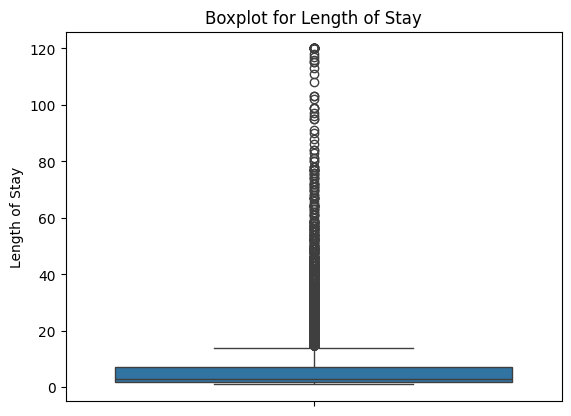

In [ ]:
sns.boxplot(y=df['Length of Stay'])
plt.title("Boxplot for Length of Stay")
plt.show()

### IQR Method

In [ ]:
Q1=df['Length of Stay'].quantile(0.25)
Q3=df['Length of Stay'].quantile(0.75)


IQR=Q3-Q1

UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

outliers=df[(df['Length of Stay']>Q3)]

outliers

,Hospital Service Area,Hospital County,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Description,Payment Typology 1,EmergeNocYes DepartmeNot INodicator,Total Charges,Total Costs,Margin$,Profit/Loss
0,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,Female,27.0,Emergency,Home / Self Care,2021-01-01,COVID-19,Government,Yes,320922.43,60241.34,260681.09,Profit
8,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,Female,21.0,Emergency,Other,2021-01-01,Complication of other surgical or medical care...,Government,Yes,270656.16,48268.17,222387.99,Profit
20,New York City,Bronx,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,Male,9.0,Emergency,Home / Self Care,2021-01-01,Intestinal obstruction and ileus,Government,Yes,123104.38,21869.90,101234.48,Profit
25,New York City,Manhattan,Bellevue Hospital Center,70 or Older,Male,14.0,Emergency,Home / Self Care,2021-01-01,Urinary tract infections,Government,Yes,103403.89,59465.92,43937.97,Profit
29,New York City,Kings,Coney Island Hospital,70 or Older,Female,19.0,Emergency,Home / Self Care,2021-01-01,COVID-19,Government,Yes,189278.99,86496.52,102782.47,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23677,New York City,Bronx,Jacobi Medical Center,70 or Older,Male,11.0,Emergency,Home / Self Care,2021-01-01,Heart failure,Government,Yes,96017.15,56989.83,39027.32,Profit
23678,New York City,Bronx,Jacobi Medical Center,50 to 69,Female,23.0,Urgent,Home / Self Care,2021-01-01,Malaise and fatigue,Private,No,172106.83,102151.94,69954.89,Profit
23679,New York City,Bronx,Jacobi Medical Center,70 or Older,Male,15.0,Emergency,Long-Term / Custodial Care,2021-01-01,Leukemia - acute myeloid leukemia (AML),Government,Yes,114186.74,67774.17,46412.57,Profit
23680,New York City,Bronx,Jacobi Medical Center,70 or Older,Male,11.0,Emergency,Home / Self Care,2021-01-01,COVID-19,Government,Yes,115066.87,68296.56,46770.31,Profit


In [ ]:
print(f'Extreme length of stay than usual : {outliers.shape[0]}')

Extreme length of stay than usual : 5358


### Total Costs

In [ ]:
df.columns

Index(['Hospital Service Area', 'Hospital County', 'Facility Name',
       'Age Group', 'Gender', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Description',
       'Payment Typology 1', 'EmergeNocYes DepartmeNot INodicator',
       'Total Charges', 'Total Costs', 'Margin$', 'Profit/Loss'],
      dtype='object')

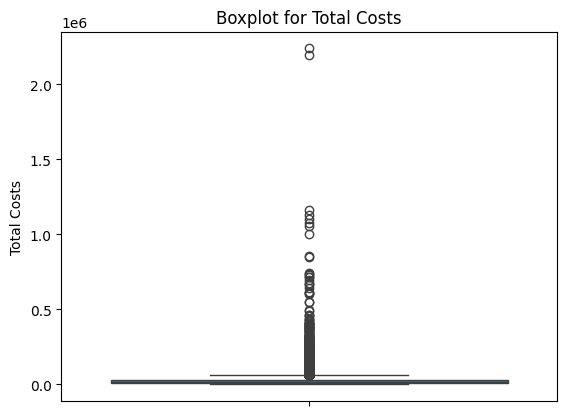

In [ ]:
#Boxplot for total costs

sns.boxplot(y=df['Total Costs'])
plt.title("Boxplot for Total Costs")
plt.show()


In [ ]:
#IQR Method

Q1=df['Total Costs'].quantile(0.25)
Q3=df['Total Costs'].quantile(0.75)


IQR=Q3-Q1

UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

outliers=df[(df['Total Costs']>Q3)]

outliers

,Hospital Service Area,Hospital County,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Description,Payment Typology 1,EmergeNocYes DepartmeNot INodicator,Total Charges,Total Costs,Margin$,Profit/Loss
0,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,Female,27.0,Emergency,Home / Self Care,2021-01-01,COVID-19,Government,Yes,320922.43,60241.34,260681.09,Profit
8,New York City,Bronx,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,Female,21.0,Emergency,Other,2021-01-01,Complication of other surgical or medical care...,Government,Yes,270656.16,48268.17,222387.99,Profit
25,New York City,Manhattan,Bellevue Hospital Center,70 or Older,Male,14.0,Emergency,Home / Self Care,2021-01-01,Urinary tract infections,Government,Yes,103403.89,59465.92,43937.97,Profit
29,New York City,Kings,Coney Island Hospital,70 or Older,Female,19.0,Emergency,Home / Self Care,2021-01-01,COVID-19,Government,Yes,189278.99,86496.52,102782.47,Profit
30,New York City,Manhattan,Bellevue Hospital Center,50 to 69,Female,2.0,Elective,Home / Self Care,2021-01-01,Male reproductive system cancers - prostate,Private,No,80569.14,46334.02,34235.12,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23678,New York City,Bronx,Jacobi Medical Center,50 to 69,Female,23.0,Urgent,Home / Self Care,2021-01-01,Malaise and fatigue,Private,No,172106.83,102151.94,69954.89,Profit
23679,New York City,Bronx,Jacobi Medical Center,70 or Older,Male,15.0,Emergency,Long-Term / Custodial Care,2021-01-01,Leukemia - acute myeloid leukemia (AML),Government,Yes,114186.74,67774.17,46412.57,Profit
23680,New York City,Bronx,Jacobi Medical Center,70 or Older,Male,11.0,Emergency,Home / Self Care,2021-01-01,COVID-19,Government,Yes,115066.87,68296.56,46770.31,Profit
23681,New York City,Bronx,Jacobi Medical Center,18 to 29,Female,11.0,Urgent,Acute / Hospital Care,2021-01-01,Aspiration pneumonitis,Government,No,155821.76,92486.14,63335.62,Profit


In [ ]:
print(f'Extreme costs higher than usual : {outliers.shape[0]}')

Extreme costs higher than usual : 5922


Insights from outliers detection:

1. **5358 Patients** are showing more than extreme length of stay than usual impacting beds availability.

2. **5922 patients** are high costs cases indicating expensive treaments.

# **Correlation**

In [ ]:
numeric_cols=[]

for i in df.columns:
  if df[i].dtype != 'object' and i != 'Discharge Year':
    numeric_cols.append(i)

In [ ]:
numeric_cols

['Length of Stay', 'Total Charges', 'Total Costs', 'Margin$']

In [ ]:
corr_df=df[numeric_cols].corr()
corr_df

,Length of Stay,Total Charges,Total Costs,Margin$
Length of Stay,1.000000,0.637879,0.756423,0.520788
Total Charges,0.637879,1.000000,0.863606,0.970510
Total Costs,0.756423,0.863606,1.000000,0.716604
Margin$,0.520788,0.970510,0.716604,1.000000


## Heatmap

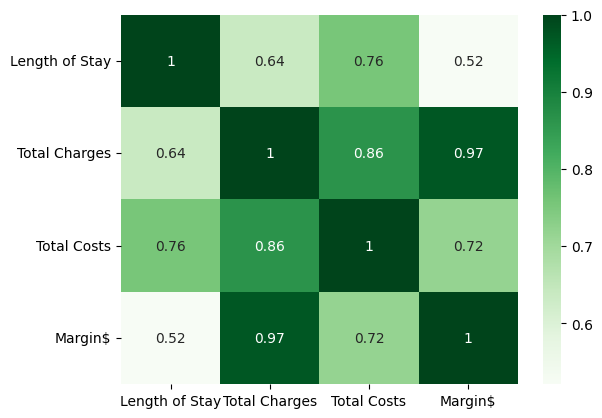

In [ ]:
#correlation matrix

sns.heatmap(corr_df, annot=True, cmap='Greens')
plt.show()

Insights:

1. Length of Stay strong postive(0.76) linear relationship with Total Costs indicating LOS increases costing to Hosiptal.

2. Total cost have strong positively(0.86) related with Total charges means cost to patient can increases the charges.

3. Margins and Total Charges is also strongly related(0.97) indicating Profitability increases with Charges.

# Conclusion & Recommendations

1. From this above analysis, Hospital managments should focused on Emergency patients which can lead to risk of beds shortage. Optimised ER staff, equipments, doctors and nurses availability, proper discharge process and cost control planning can give best patient flow.

2. Advised to look upon High costing cases which can lead to high financial risk if treament goes wrong. And also on reasons causing patients with unusual LOS leading bed shortage.

3. Older groups must be given Geriatric services with optimised resources.

4. Tops hospital like Bellevue Hospital Center & Montefiore Medical Center - Henry & Lucy Moses Div with high patient load.Highly recommended to look more on ER staff, other resources planning.

5. Profit margins is high than Loss leading proper pricing.

6. Expensive diagnoses require proper cost controlling planning to avoid financial risk.

7. Optimisation for higher LOS patients to avoid beds shortage. So new patients can be admitted.
